In [12]:
import pandas as pd

df=pd.read_csv("gold_dataset.csv")
df.head()

,date,gold_price_lkr,gold_price_usd,gold_reserves_us,silver_price,s&p_500,ny_stock_ex_rate,inflation_rate_us,fed_rate,buying_exchange_rates,selling_exchange_rates
0,2/1/2014,158636.7799,1225.0,3.36,20.10,1831.979980,10283.41992,1.6,0.08,129.27,132.23
1,3/1/2014,160947.6364,1238.4,3.39,20.18,1831.369995,10296.76953,1.6,0.08,129.25,132.21
2,6/1/2014,162422.8858,1237.8,3.40,20.08,1826.770020,10270.04981,1.6,0.08,129.26,132.22
3,7/1/2014,162412.0626,1229.4,3.36,19.76,1837.880005,10327.33008,1.6,0.07,129.24,132.20
4,8/1/2014,160678.0742,1225.3,3.55,19.52,1837.489990,10320.91016,1.6,0.07,129.35,132.23


Mapping monthly data to a daily time series dataset is a common task in time series analysis. The industry-standard method for this is called resampling. Resampling involves changing the frequency of your time series observations.

**Two types of resampling are:**

- **Upsampling:** Where you increase the frequency of the samples, such as 
from minutes to seconds.

- **Downsampling:** Where you decrease the frequency of the samples, such as from days to months.
In your case, you want to distribute the monthly values (lower frequency) to a daily frequency. This is a type of upsampling.

Resample the data to the daily level and use a method to distribute the monthly values. The ffill() function can be used to forward-fill the daily rows with the monthly value.

In [13]:
df.columns

Index(['date', 'gold_price_lkr', 'gold_price_usd', 'gold_reserves_us',
       'silver_price', 's&p_500', 'ny_stock_ex_rate', 'inflation_rate_us',
       'fed_rate', 'buying_exchange_rates', 'selling_exchange_rates'],
      dtype='object')

In [14]:
df=df[['date', 'gold_price_usd', 'gold_reserves_us',
       'silver_price', 's&p_500', 'ny_stock_ex_rate', 'inflation_rate_us',
       'fed_rate']]

In [15]:
df.shape

(2668, 8)

In [16]:
df.isnull().sum()

date                 0
gold_price_usd       0
gold_reserves_us     0
silver_price         0
s&p_500              0
ny_stock_ex_rate     0
inflation_rate_us    0
fed_rate             0
dtype: int64

In [17]:
df.tail()

,date,gold_price_usd,gold_reserves_us,silver_price,s&p_500,ny_stock_ex_rate,inflation_rate_us,fed_rate
2663,19/03/2024,2156.3,2.97,24.862000,5151.513965,17975.78906,3.1,5.33
2664,20/03/2024,2157.9,2.97,24.996400,5146.762754,18130.08008,3.1,5.33
2665,21/03/2024,2182.4,2.92,25.003680,5143.053293,18214.11914,3.1,5.33
2666,22/03/2024,2158.1,3.01,25.030416,5141.567956,18112.03906,3.1,5.33
2667,25/03/2024,2174.8,3.02,24.996499,5146.463578,18077.15039,3.1,5.33


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2668 non-null   object 
 1   gold_price_usd     2668 non-null   float64
 2   gold_reserves_us   2668 non-null   float64
 3   silver_price       2668 non-null   float64
 4   s&p_500            2668 non-null   float64
 5   ny_stock_ex_rate   2668 non-null   float64
 6   inflation_rate_us  2668 non-null   float64
 7   fed_rate           2668 non-null   float64
dtypes: float64(7), object(1)
memory usage: 166.9+ KB


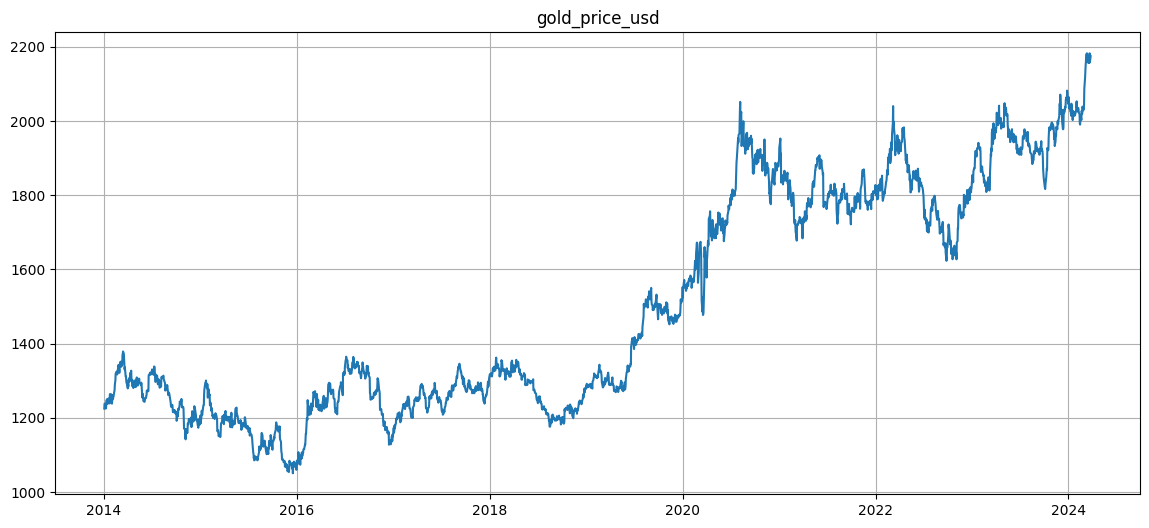

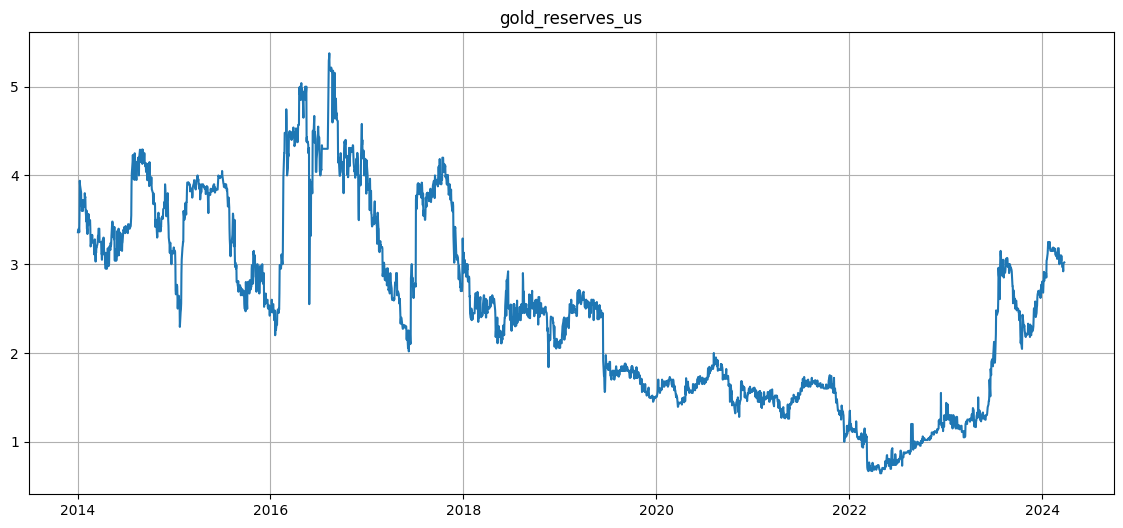

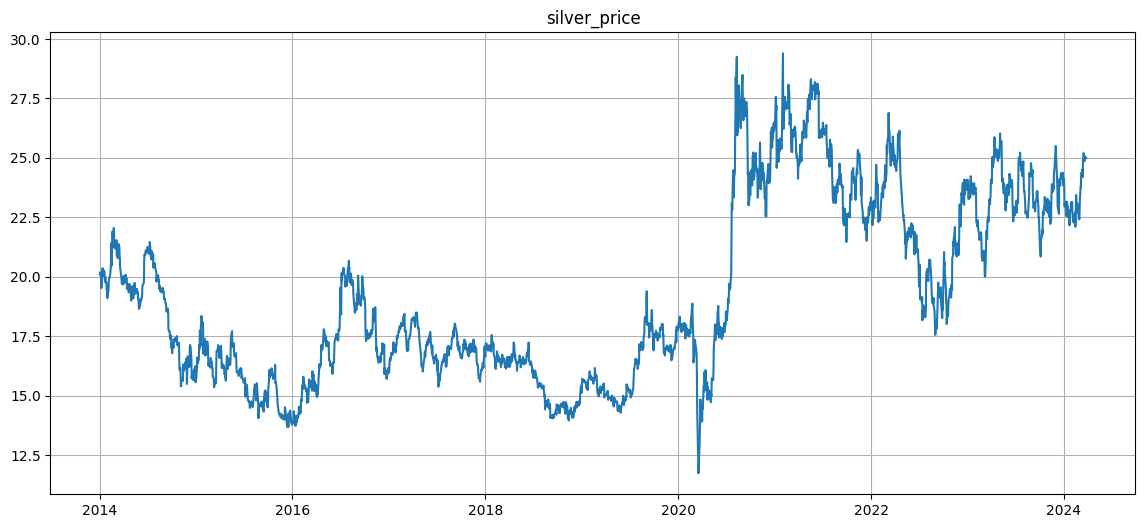

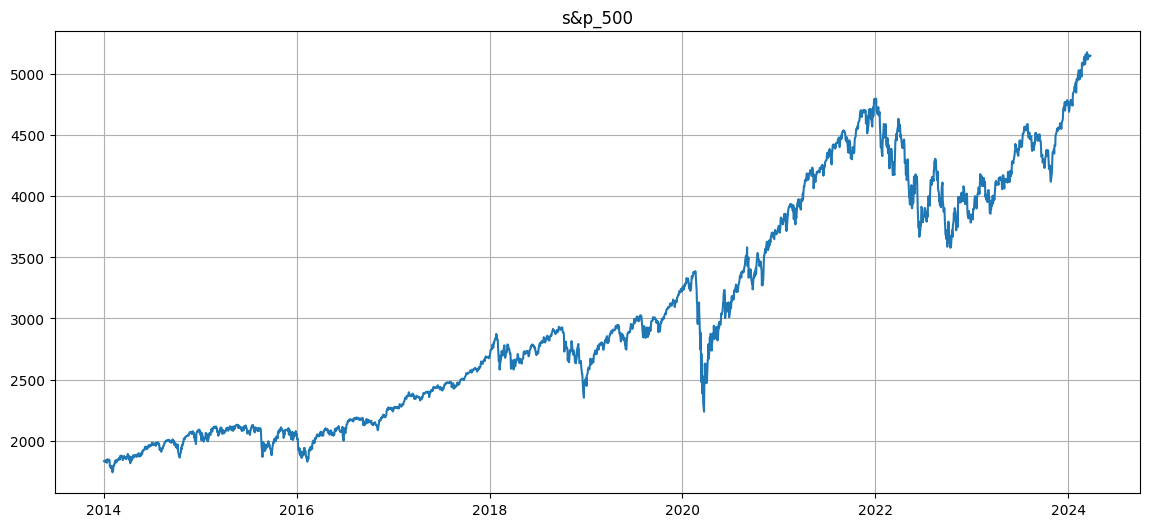

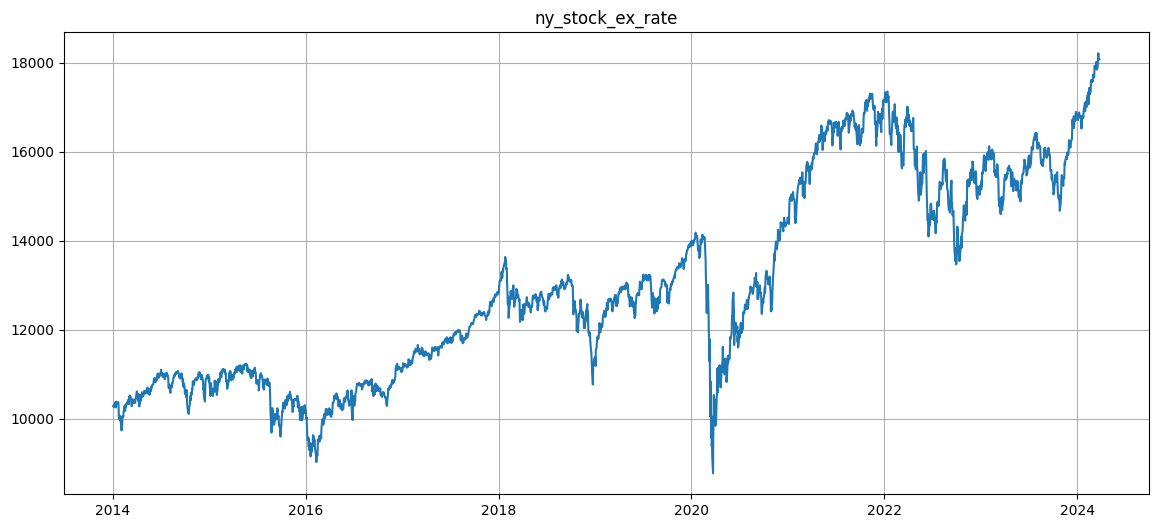

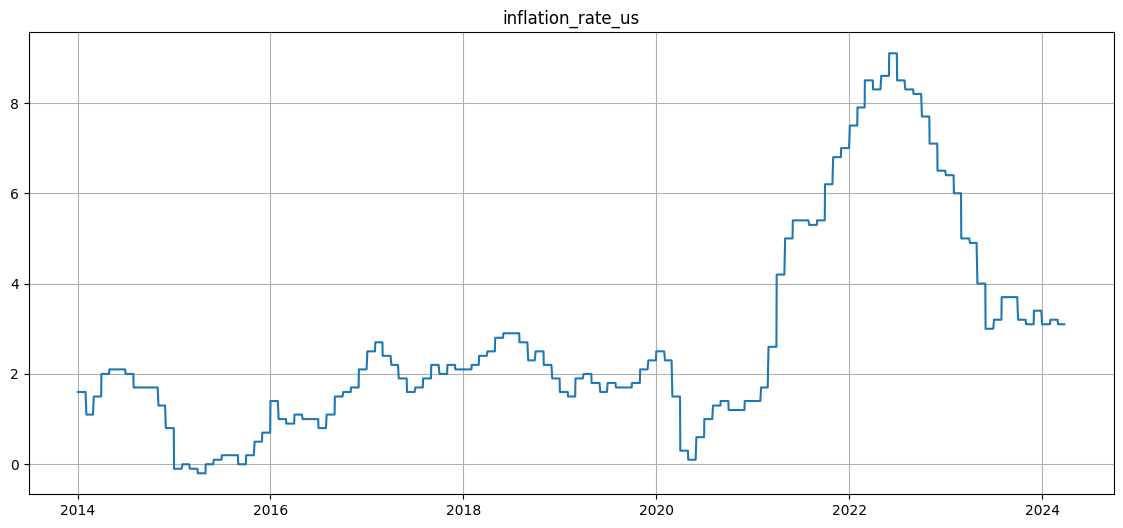

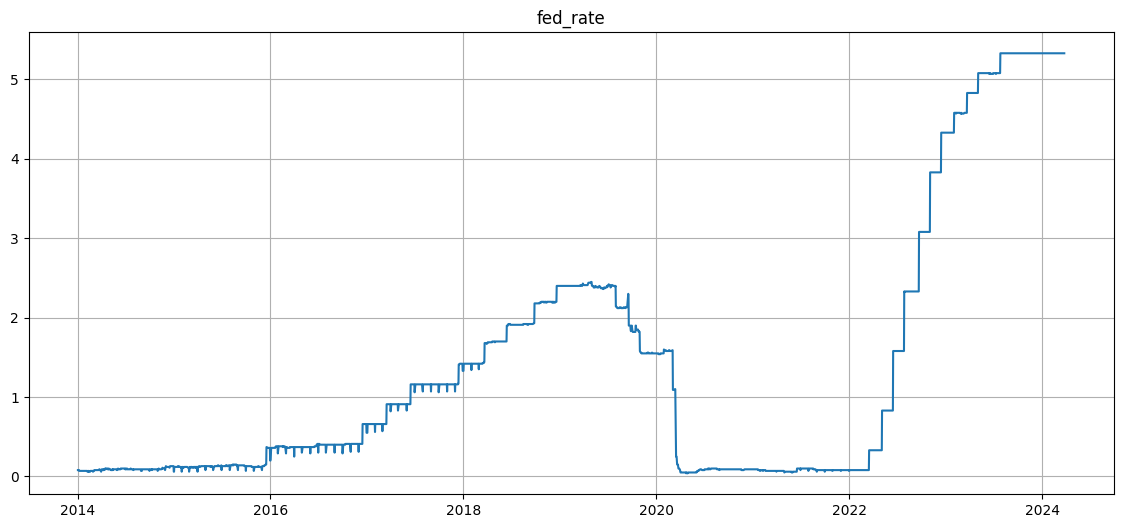

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Plot each column
for column in df.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(df[column])
    plt.title(column)
    plt.grid(True)
    plt.show()


In [20]:
df.head()

,gold_price_usd,gold_reserves_us,silver_price,s&p_500,ny_stock_ex_rate,inflation_rate_us,fed_rate
date,,,,,,,
2014-01-02,1225.0,3.36,20.10,1831.979980,10283.41992,1.6,0.08
2014-01-03,1238.4,3.39,20.18,1831.369995,10296.76953,1.6,0.08
2014-01-06,1237.8,3.40,20.08,1826.770020,10270.04981,1.6,0.08
2014-01-07,1229.4,3.36,19.76,1837.880005,10327.33008,1.6,0.07
2014-01-08,1225.3,3.55,19.52,1837.489990,10320.91016,1.6,0.07


In [21]:
df.shape

(2668, 7)

In [23]:
df.head()

,gold_price_usd,gold_reserves_us,silver_price,s&p_500,ny_stock_ex_rate,inflation_rate_us,fed_rate
date,,,,,,,
2014-01-02,1225.0,3.36,20.10,1831.979980,10283.41992,1.6,0.08
2014-01-03,1238.4,3.39,20.18,1831.369995,10296.76953,1.6,0.08
2014-01-06,1237.8,3.40,20.08,1826.770020,10270.04981,1.6,0.08
2014-01-07,1229.4,3.36,19.76,1837.880005,10327.33008,1.6,0.07
2014-01-08,1225.3,3.55,19.52,1837.489990,10320.91016,1.6,0.07


Dataset Range 

- 2014/1/2-2024/03/25

In [24]:
from sklearn.preprocessing import MinMaxScaler
# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [27]:
scaled_data[0]

array([0.15392772, 0.57387445, 0.47368421, 0.02623944, 0.15959327,
       0.19354839, 0.00756144])

In [28]:
# Splitting dataset into train and test split
training_size = int(len(scaled_data)*0.65)
test_size = len(scaled_data) - training_size
train_data, test_data = scaled_data[0:training_size,:], scaled_data[training_size:len(scaled_data),:]

In [30]:
train_data.shape

(1734, 7)

In [31]:
test_data.shape

(934, 7)

In [32]:
train_data[0]

array([0.15392772, 0.57387445, 0.47368421, 0.02623944, 0.15959327,
       0.19354839, 0.00756144])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
import numpy as np
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :-1]  # take all columns except the target
        dataX.append(a)
        dataY.append(dataset[i + look_back, -1])  # take the target column
    return np.array(dataX), np.array(dataY)

In [34]:
# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [35]:
print(X_train.shape), print(y_train.shape)

(1723, 10, 6)
(1723,)


(None, None)

In [40]:
X_train[0][0]

array([0.15392772, 0.57387445, 0.47368421, 0.02623944, 0.15959327,
       0.19354839])

In [41]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [42]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')